In [1]:
import tensorflow as tf


In [2]:
#Symbolic variables
a = tf.placeholder("float")
b = tf.placeholder("float")

y = tf.mul(a, b)

'''
tf.add
tf.sub
tf.mul
tf.div
tf.mod
tf.abs
tf.neg
tf.sign
tf.inv
tf.square
tf.round
tf.sqrt
tf.pow
tf.exp
tf.log
tf.maximum
tf.minimum
tf.cos
tf.sin
'''

'''
On Matrices

tf.diag
tf.transpose
tf.matmul
tf.matrix_determinant
tf.matrix_inverse
'''


'\nOn Matrices\n\ntf.diag\ntf.transpose\ntf.matmul\ntf.matrix_determinant\ntf.matrix_inverse\n'

In [3]:
sess = tf.Session()

# feed_dict to specify input values

print(sess.run(y, feed_dict={a:3, b:4}))

12.0


In [4]:
# Linear Regression
import numpy as np
num_points = 1000
vector_set = []

for i in xrange(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)

    vector_set.append([x1, y1])

In [5]:
x_data = [v[0] for v in vector_set]
y_data = [v[1] for v in vector_set]

print("x_data.shape", len(x_data))
print("v[0]", x_data[0])

('x_data.shape', 1000)
('v[0]', -0.24043804162511814)


In [6]:
import matplotlib.pyplot as plt

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

y = W * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))

In [7]:
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [8]:
# Run
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init)

In [9]:
for step in xrange(40):
    sess.run(train)
#     print sess.run(loss)
#     print step, sess.run(W), sess.run(b)

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


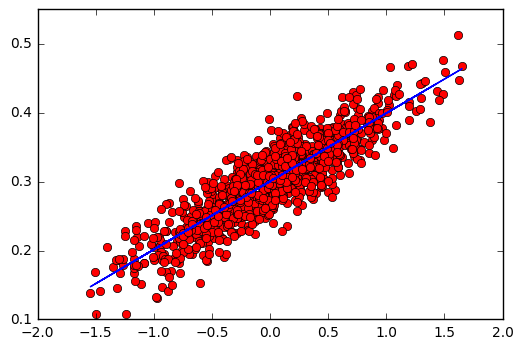

In [10]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.legend()
plt.show()

In [11]:
%%time

import numpy as np
import h5py

with h5py.File('../fonts.hdf5','r') as hf:
    print('List of arrays in this file: \n', hf.keys())
    data = hf.get('fonts')
    
    smallDataSize = 5000

    As = data[:smallDataSize,0,:,:]
    Bs = data[:smallDataSize,1,:,:]

    As_reshaped = As.reshape((smallDataSize, 64*64))
    Bs_reshaped = Bs.reshape((smallDataSize, 64*64))

    print("As.shape", As.shape)
    print("Bs.shape", Bs.shape)
    
    print("As_reshaped.shape", As_reshaped.shape)
    print("Bs_reshaped.shape", Bs_reshaped.shape)

('List of arrays in this file: \n', [u'fonts'])
('As.shape', (5000, 64, 64))
('Bs.shape', (5000, 64, 64))
('As_reshaped.shape', (5000, 4096))
('Bs_reshaped.shape', (5000, 4096))


In [12]:
training_size = (int)(smallDataSize * 0.90)
test_size = smallDataSize - training_size

print("training_size", training_size)
print("test_size", test_size)
As_reshaped_training = As_reshaped[:training_size, :]
Bs_reshaped_training = Bs_reshaped[:training_size, :]

As_reshaped_test = As_reshaped[training_size:, :]
Bs_reshaped_test = Bs_reshaped[training_size:, :]

print("As_reshaped_training.shape", As_reshaped_training.shape)
print("Bs_reshaped_training.shape", Bs_reshaped_training.shape)
print("As_reshaped_test.shape", As_reshaped_test.shape)
print("Bs_reshaped_test.shape", Bs_reshaped_test.shape)

('training_size', 4500)
('test_size', 500)
('As_reshaped_training.shape', (4500, 4096))
('Bs_reshaped_training.shape', (4500, 4096))
('As_reshaped_test.shape', (500, 4096))
('Bs_reshaped_test.shape', (500, 4096))


In [13]:
Bs_reshaped_training_firstBit = Bs_reshaped_training[:, 0]
print("Bs_reshaped_training_firstBit.shape", Bs_reshaped_training_firstBit.shape)

Bs_reshaped_test_firstBit = Bs_reshaped_test[:, 0]
print("Bs_reshaped_test_firstBit.shape", Bs_reshaped_test_firstBit.shape)

final_training = As_reshaped_training.astype(float)

final_target = Bs_reshaped_training_firstBit.astype(float)

('Bs_reshaped_training_firstBit.shape', (4500,))
('Bs_reshaped_test_firstBit.shape', (500,))


In [19]:
%%time

X1 = tf.placeholder(tf.float32, [None, 64 * 64])
W1 = tf.Variable(tf.zeros([4096, 1]))
b1 = tf.Variable(tf.zeros([1]))

y1 = tf.matmul(X1, W1) + b1

loss = tf.reduce_mean(tf.square(y1 - final_target))

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(0.00000001)
train = optimizer.minimize(loss)

# Run
init = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init, feed_dict={X1:final_training})

for step in xrange(40):
    _, loss_val, W1_val, b1_val = sess.run([train, loss, W1, b1], feed_dict={X1:final_training})
#     print(loss_val)
print(loss_val)


497.052
CPU times: user 39.5 s, sys: 2.38 s, total: 41.9 s
Wall time: 42.4 s


In [29]:
y_expected = tf.placeholder(tf.float32, [None, ])

correct_prediction = tf.equal(y1, y_expected)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

final_test = As_reshaped_test.astype(float)
final_test_target = Bs_reshaped_test_firstBit.astype(float)

print(sess.run(y1, feed_dict={X1: final_test, y_expected: final_test_target}))
print(final_test_target)

[[ 2.01969719]
 [ 1.43189859]
 [ 0.63225979]
 [ 0.63225979]
 [ 0.63225979]
 [ 1.63506746]
 [ 1.67212224]
 [ 0.46108907]
 [ 0.89498127]
 [ 2.6923511 ]
 [ 1.85199738]
 [ 2.00913739]
 [ 1.76215899]
 [ 1.09437847]
 [ 0.84372872]
 [ 2.56668949]
 [ 1.52850115]
 [ 1.88611925]
 [ 2.19696832]
 [ 2.1033411 ]
 [ 1.29447925]
 [ 1.73024487]
 [ 1.76779556]
 [ 1.28059697]
 [ 1.59970891]
 [ 2.04301167]
 [ 1.52850115]
 [ 3.07056022]
 [ 1.93480349]
 [ 2.04301167]
 [ 1.54968727]
 [ 2.1806922 ]
 [ 2.24493408]
 [ 2.1587162 ]
 [ 2.11372662]
 [ 1.99889207]
 [ 1.03061128]
 [ 1.40425801]
 [ 0.86903661]
 [ 1.08548105]
 [ 1.89084649]
 [ 0.84454   ]
 [ 0.80352604]
 [ 0.79021519]
 [ 0.67578429]
 [ 0.54804879]
 [ 0.32813546]
 [ 0.86626327]
 [ 0.86626327]
 [ 0.33913523]
 [ 1.42910504]
 [ 1.02433169]
 [ 1.07080698]
 [ 0.84016496]
 [ 2.6782999 ]
 [ 2.08823252]
 [ 1.16258407]
 [ 1.62612736]
 [ 1.60498202]
 [ 1.5364697 ]
 [ 1.47172987]
 [ 1.50672603]
 [ 1.63384831]
 [ 1.29133058]
 [ 0.94405156]
 [ 0.97737271]
 [ 2.56494

In [21]:
print(W1_val)

[[  2.89388083e-07]
 [  2.10607070e-07]
 [  2.23267065e-07]
 ..., 
 [ -3.74329034e-07]
 [ -3.56460617e-07]
 [ -2.50756614e-07]]
